In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from astropy.table import Table
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../train_data/TrainingOriginal.csv')
len(data)

2412

In [3]:
data.head()

,Unnamed: 0,APOGEE_ID,source_id,LOGG,TEFF,MG_FE,FE_H_1,C_FE,N_FE,G,...,age_68L,ageErr,logAge,logAgeErr,distKpc,distKpc_68U,distKpc_68L,distErrKpc,logDistKpc,logDistKpcErr
0,96,2M18505286+4432362,2105362083394042496,2.612084,4532.023438,0.079627,0.171318,0.098425,0.225120,11.437590,...,9.8855,1.6359,1.075021,0.062084,0.949597,0.959346,0.940806,0.009270,-0.022461,0.004238
1,1370,2M19263832+4240515,2125791318679254784,2.668956,4594.943848,0.007557,0.147208,0.051968,0.201030,12.541131,...,7.7786,1.4048,0.944004,0.066960,1.661610,1.680687,1.646228,0.017229,0.220529,0.004498
2,2583,2M19491405+4134233,2076894284238667904,2.571587,4655.399902,-0.024216,-0.026657,-0.011852,0.206955,9.852841,...,2.9080,0.6538,0.506519,0.080632,0.631819,0.640135,0.623017,0.008559,-0.199407,0.005886
3,1405,2M19272602+4221542,2125771390030125056,2.731084,4722.627930,0.007969,0.049620,0.014740,0.238237,12.800866,...,2.8510,0.8443,0.542153,0.101010,2.151779,2.185176,2.119093,0.033042,0.332798,0.006668
4,1584,2M19305546+3815037,2051928738868317440,2.938272,5037.334473,-0.054421,0.162278,-0.135970,0.452220,11.157132,...,0.6095,0.0123,-0.207889,0.008592,1.164437,1.170807,1.157657,0.006575,0.066116,0.002453


In [4]:
feats = ['LOGG', 'TEFF', 'MG_FE', 'FE_H_1', 'C_FE', 'N_FE', \
           'G', 'BP', 'RP', 'J', 'H', 'K']

featsErr = ['LOGG_ERR', 'TEFF_ERR', 'MG_FE_ERR', 'FE_H_ERR', 'C_FE_ERR', 'N_FE_ERR',  \
           'G_ERR', 'BP_ERR', 'RP_ERR', 'J_ERR', 'H_ERR', 'K_ERR']

def norm(feat, eFeat):
    
    mu  = np.mean(feat)
    std = np.std(feat)
    
    scaledFeat  = (feat-mu)/std
    scaledEFeat = eFeat/std

    return(scaledFeat,scaledEFeat)

In [5]:
for i in range(len(feats)):
    scaledFeat, scaledEFeat = norm(data[feats[i]], data[featsErr[i]])
    data[feats[i]+'_NORM'] = scaledFeat
    data[featsErr[i]+'_NORM'] = scaledEFeat

In [6]:
data.head()

,Unnamed: 0,APOGEE_ID,source_id,LOGG,TEFF,MG_FE,FE_H_1,C_FE,N_FE,G,...,BP_NORM,BP_ERR_NORM,RP_NORM,RP_ERR_NORM,J_NORM,J_ERR_NORM,H_NORM,H_ERR_NORM,K_NORM,K_ERR_NORM
0,96,2M18505286+4432362,2105362083394042496,2.612084,4532.023438,0.079627,0.171318,0.098425,0.225120,11.437590,...,-0.488302,0.000614,-0.586660,0.000278,-0.699683,0.025141,-0.689540,0.024354,-0.713836,0.012764
1,1370,2M19263832+4240515,2125791318679254784,2.668956,4594.943848,0.007557,0.147208,0.051968,0.201030,12.541131,...,0.692942,0.000564,0.636076,0.000436,0.606529,0.028570,0.550177,0.019715,0.567173,0.018565
2,2583,2M19491405+4134233,2076894284238667904,2.571587,4655.399902,-0.024216,-0.026657,-0.011852,0.206955,9.852841,...,-2.204866,0.000801,-2.343344,0.000580,-2.482438,0.026284,-2.540415,0.033631,-2.546003,0.019726
3,1405,2M19272602+4221542,2125771390030125056,2.731084,4722.627930,0.007969,0.049620,0.014740,0.238237,12.800866,...,0.938827,0.000656,0.951186,0.000439,0.959651,0.023999,0.957230,0.019715,0.961686,0.018565
4,1584,2M19305546+3815037,2051928738868317440,2.938272,5037.334473,-0.054421,0.162278,-0.135970,0.452220,11.157132,...,-0.876825,0.000648,-0.826550,0.000287,-0.779678,0.025141,-0.694178,0.023194,-0.696431,0.020886


In [7]:
N = len(feats)
mu_feats = np.ones(N)
std_feats = np.ones(N)

for i in range(len(feats)):
    mu_feats[i] = np.mean(data[feats[i]])
    std_feats[i] = np.std(data[feats[i]])

In [8]:
np.save('../train_data/AllGlobal_Mu_Final.npy', mu_feats)
np.save('../train_data/AllGlobal_Std_Final.npy', std_feats)

In [9]:
mu_feats[0]

2.7330705653968734

In [10]:
np.mean(data['LOGG'])

2.7330705653968734

In [11]:
data.to_csv('../train_data/AllTrainedNorm.csv')

In [12]:
data.head()

,Unnamed: 0,APOGEE_ID,source_id,LOGG,TEFF,MG_FE,FE_H_1,C_FE,N_FE,G,...,BP_NORM,BP_ERR_NORM,RP_NORM,RP_ERR_NORM,J_NORM,J_ERR_NORM,H_NORM,H_ERR_NORM,K_NORM,K_ERR_NORM
0,96,2M18505286+4432362,2105362083394042496,2.612084,4532.023438,0.079627,0.171318,0.098425,0.225120,11.437590,...,-0.488302,0.000614,-0.586660,0.000278,-0.699683,0.025141,-0.689540,0.024354,-0.713836,0.012764
1,1370,2M19263832+4240515,2125791318679254784,2.668956,4594.943848,0.007557,0.147208,0.051968,0.201030,12.541131,...,0.692942,0.000564,0.636076,0.000436,0.606529,0.028570,0.550177,0.019715,0.567173,0.018565
2,2583,2M19491405+4134233,2076894284238667904,2.571587,4655.399902,-0.024216,-0.026657,-0.011852,0.206955,9.852841,...,-2.204866,0.000801,-2.343344,0.000580,-2.482438,0.026284,-2.540415,0.033631,-2.546003,0.019726
3,1405,2M19272602+4221542,2125771390030125056,2.731084,4722.627930,0.007969,0.049620,0.014740,0.238237,12.800866,...,0.938827,0.000656,0.951186,0.000439,0.959651,0.023999,0.957230,0.019715,0.961686,0.018565
4,1584,2M19305546+3815037,2051928738868317440,2.938272,5037.334473,-0.054421,0.162278,-0.135970,0.452220,11.157132,...,-0.876825,0.000648,-0.826550,0.000287,-0.779678,0.025141,-0.694178,0.023194,-0.696431,0.020886


(array([ 21.,  49.,  99., 182., 299., 415., 461., 556., 322.,   8.]),
 array([ 8.90532112,  9.40657339,  9.90782566, 10.40907793, 10.9103302 ,
        11.41158247, 11.91283474, 12.41408701, 12.91533928, 13.41659155,
        13.91784382]),
 <BarContainer object of 10 artists>)

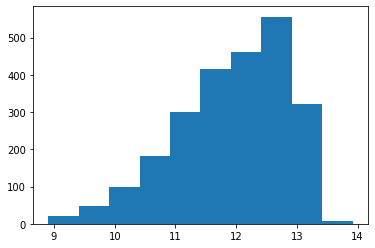

In [13]:
plt.hist(data['G'])

(array([ 21.,  49.,  99., 182., 299., 415., 461., 556., 322.,   8.]),
 array([-3.31367479, -2.76601863, -2.21836247, -1.67070631, -1.12305015,
        -0.57539399, -0.02773783,  0.51991833,  1.0675745 ,  1.61523066,
         2.16288682]),
 <BarContainer object of 10 artists>)

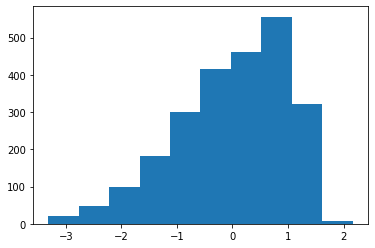

In [14]:
plt.hist((data['G']-np.mean(data['G']))/np.std(data['G']))

(array([ 21.,  49.,  99., 182., 299., 415., 461., 556., 322.,   8.]),
 array([-3.31367479, -2.76601863, -2.21836247, -1.67070631, -1.12305015,
        -0.57539399, -0.02773783,  0.51991833,  1.0675745 ,  1.61523066,
         2.16288682]),
 <BarContainer object of 10 artists>)

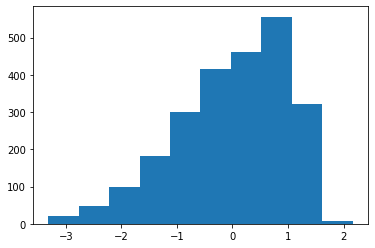

In [15]:
plt.hist(data['G_NORM'])

In [16]:
data.columns

Index(['Unnamed: 0', 'APOGEE_ID', 'source_id', 'LOGG', 'TEFF', 'MG_FE',
       'FE_H_1', 'C_FE', 'N_FE', 'G', 'BP', 'RP', 'J', 'H', 'K', 'LOGG_ERR',
       'TEFF_ERR', 'MG_FE_ERR', 'FE_H_ERR', 'C_FE_ERR', 'N_FE_ERR', 'G_ERR',
       'BP_ERR', 'RP_ERR', 'J_ERR', 'H_ERR', 'K_ERR', 'age', 'age_68U',
       'age_68L', 'ageErr', 'logAge', 'logAgeErr', 'distKpc', 'distKpc_68U',
       'distKpc_68L', 'distErrKpc', 'logDistKpc', 'logDistKpcErr', 'LOGG_NORM',
       'LOGG_ERR_NORM', 'TEFF_NORM', 'TEFF_ERR_NORM', 'MG_FE_NORM',
       'MG_FE_ERR_NORM', 'FE_H_1_NORM', 'FE_H_ERR_NORM', 'C_FE_NORM',
       'C_FE_ERR_NORM', 'N_FE_NORM', 'N_FE_ERR_NORM', 'G_NORM', 'G_ERR_NORM',
       'BP_NORM', 'BP_ERR_NORM', 'RP_NORM', 'RP_ERR_NORM', 'J_NORM',
       'J_ERR_NORM', 'H_NORM', 'H_ERR_NORM', 'K_NORM', 'K_ERR_NORM'],
      dtype='object')

In [17]:
len(data)

2412